In [1]:
source("../../utils.R")

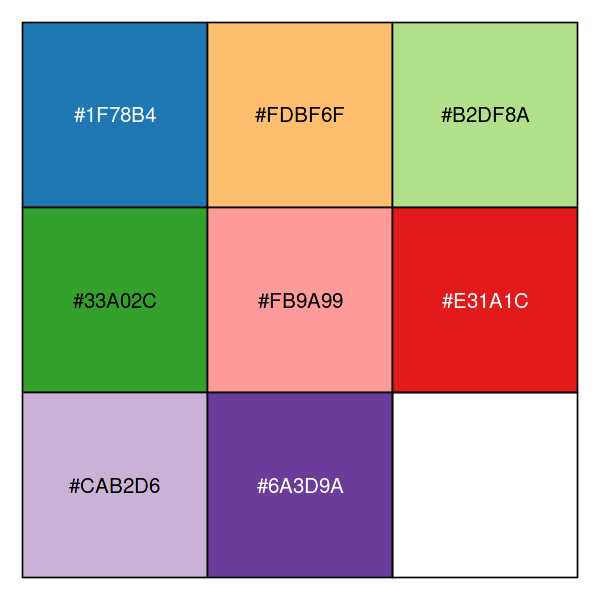

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1,1))
my_col <- brewer.pal(10, "Paired")[c(2,7,3:6,9:10)]
show_col(my_col)

In [3]:
k_ls <- c(10, 13, 10, 9, 13, 15)
datasets <- c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC")
vline_data <- data.frame(dataset = datasets, vline_x = k_ls)
vline_data$dataset <- factor(vline_data$dataset , levels = datasets)

In [4]:
df_metrics <- read.table("../../AV_AW_tradeoff/results_all_metrics.tsv", sep="\t", header=TRUE)
df_metrics$dataset <- factor(df_metrics$dataset, levels=datasets)

In [5]:
head(df_metrics)

,n_clusters,metric,value,tool,method,feature_type,tile_size,distance,ndim,resolution,seed,k_optimal,dataset
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<fct>
1,10,ARI,0.9661907,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line
2,10,AMI,0.9576516,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line
3,10,MI,2.0681147,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line
4,10,VI,0.1749132,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line
5,10,AW,0.9591388,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line
6,10,AV,0.9733470,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,0,10,Cell line


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


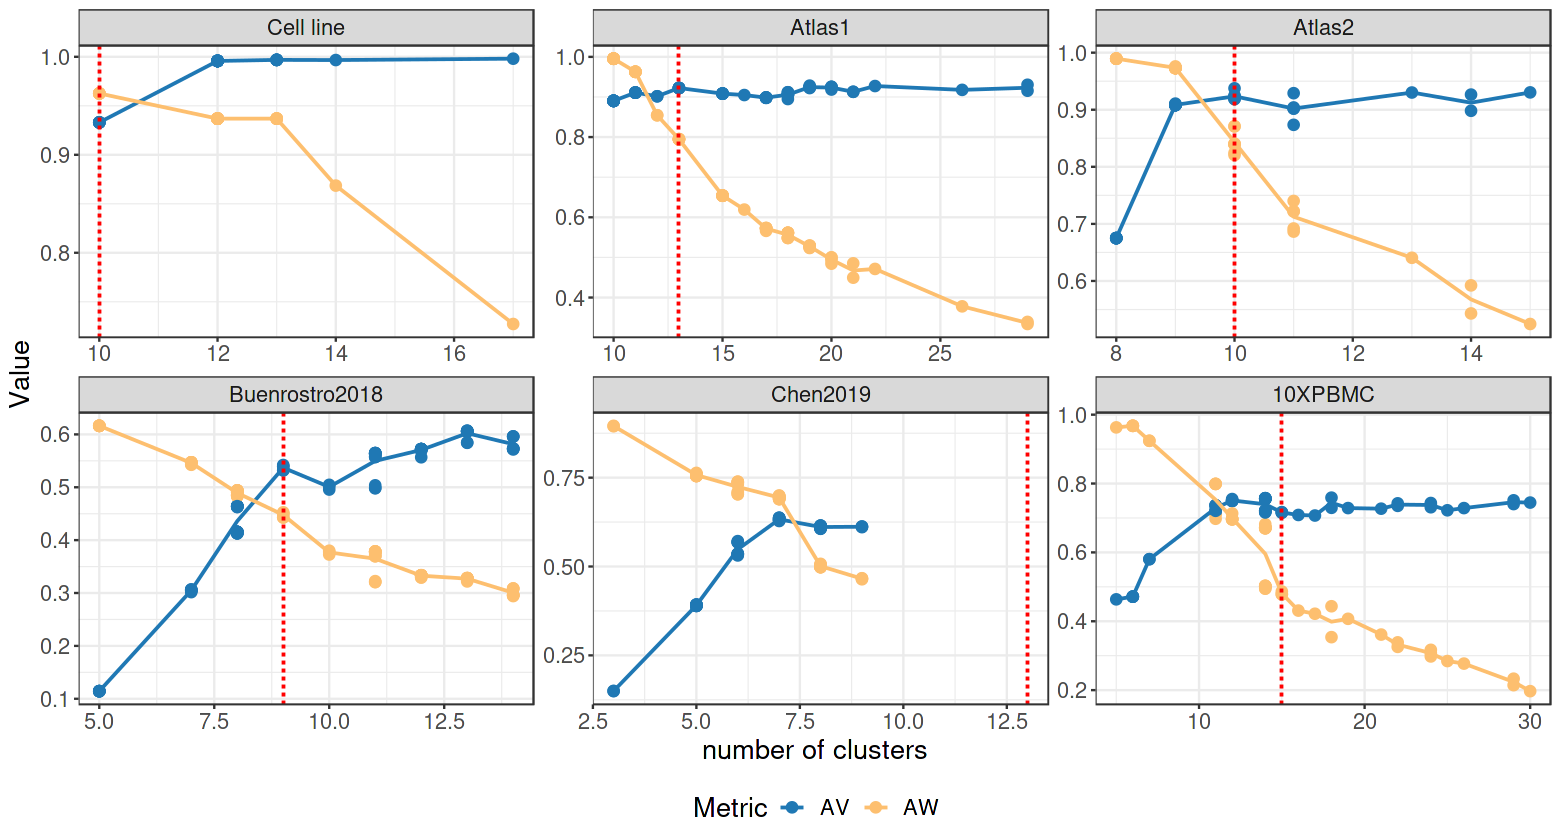

In [6]:
options(repr.plot.width=13, repr.plot.height=7)

p1 <-
df_metrics %>% filter(metric %in% c("AW", "AV")) %>% filter(ndim == 15 & method == "ArchR_peaks") %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, method, n_clusters, metric) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=metric)) + 
  geom_point(size=2.5) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=metric)) + 
  facet_wrap(~dataset, scales = "free", nrow = 2, ncol = 3) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("Value") +
  labs(color="Metric") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  scale_colour_manual(values = my_col) 
  
p1

In [7]:
pdf("AV_AW_tradeoff.pdf", width=13, height=7)
plot(p1)
dev.off() 

png 
  2